In [1]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import pandas as pd
import pdb
import datetime
import time

plt.rc('font', size=14)
df = pd.read_csv('data/merged.csv')
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,state,county,addr,death,injured,link
0,2234444,2022-02-15,Alabama,Birmingham,421 Oporto Blvd,0,1,/incident/2234444
1,2234434,2022-02-15,Texas,Fort Worth,3700 Mighty Mite Dr,0,0,https://dfw.cbslocal.com/2022/02/15/16-year-ol...
2,2234401,2022-02-15,Texas,Corpus Christi,1700 block of 15th St,0,1,https://www.kristv.com/news/local-news/man-sho...
3,2234412,2022-02-15,Texas,Corpus Christi,2200 block of Prescott St,1,0,https://www.kristv.com/news/local-news/one-man...
4,2234395,2022-02-15,Massachusetts,Boston,1261 Massachusetts Ave,0,1,https://www.boston25news.com/news/local/1-pers...


In [2]:
county_count = df[['state', 'county', 'death', 'injured']].groupby(by=['state', 'county']).sum()
county_count['total'] = county_count['death'] + county_count['injured']
county_count.sort_values(by='total', ascending=False, inplace=True)
county_count.head()

,,death,injured,total
state,county,,,
Pennsylvania,Philadelphia,9,19,28
Texas,Houston,8,19,27
Maryland,Baltimore,10,16,26
Illinois,Chicago,3,19,22
Wisconsin,Milwaukee,1,20,21


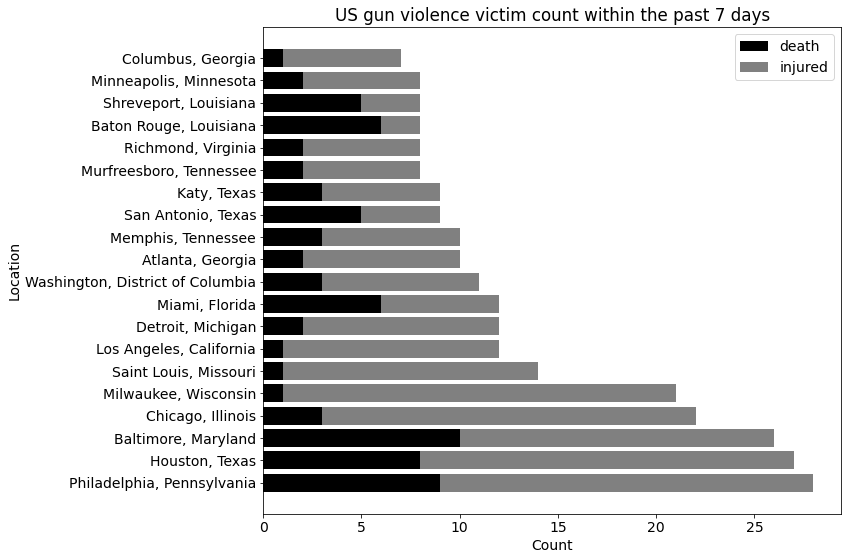

In [3]:
def plot_victim_groupby(df, days=3, limit=20, groupby=['state', 'county']):
    df = df[df.date > datetime.datetime.now() - pd.to_timedelta(f'{days}day')]
    count = df[['state', 'county', 'death', 'injured']].groupby(by=groupby).sum()
    count['total'] = count['death'] + count['injured']
    count.sort_values(by='total', ascending=False, inplace=True)
    if len(groupby) == 2:
        labels = [county + ', ' + state for state, county in count[:limit].index]
    else:
        labels = count[:limit].index
    # print(labels)
    
    fig = plt.figure(figsize=(12, 8))
    plt.barh(labels, count[:limit]['death'], label='death', color='black')
    plt.barh(labels, count[:limit]['injured'], left=count[:limit]['death'], label='injured', color='gray')
    plt.legend()
    plt.xlabel('Count')
    plt.ylabel('Location')
    plt.title(f'US gun violence victim count within the past {days} days')
    plt.tight_layout()
    return fig

fig = plot_victim_groupby(df, days=7)
fig.savefig('docs/imgs/victim_city_7days.png')


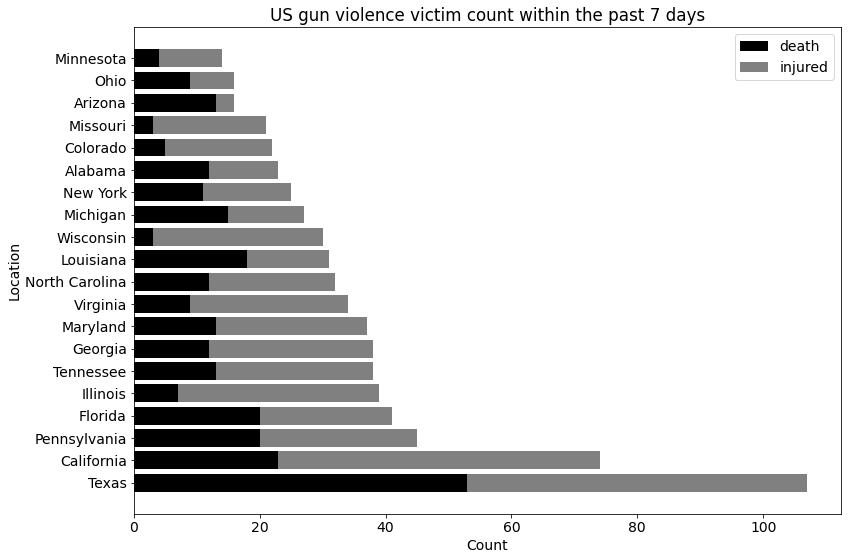

In [4]:
fig = plot_victim_groupby(df, days=7, groupby=['state'])
fig.savefig('docs/imgs/victim_state_7days.png')


In [5]:
date_count = df[['date', 'injured', 'death']].groupby('date').sum()
date_count['total'] = date_count['injured'] + date_count['death']
date_count

,injured,death,total
date,,,
2022-02-12,55,31,86
2022-02-13,97,62,159
2022-02-14,67,53,120
2022-02-15,109,73,182
2022-02-16,77,66,143
2022-02-17,83,47,130
2022-02-18,29,14,43


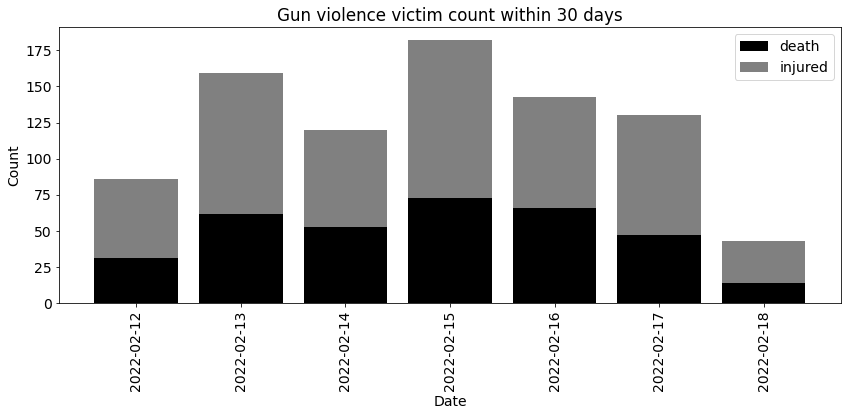

In [6]:
def plot_victim_time(df, days=90):
    df = df[df.date > datetime.datetime.now() - pd.to_timedelta(f'{days}day')]
    date_count = df[['date', 'injured', 'death']].groupby('date').sum()
    date_count['total'] = date_count['injured'] + date_count['death']
    fig = plt.figure(figsize=(12, 6))
    plt.bar(date_count.index, date_count['death'], label='death', color='black')
    plt.bar(date_count.index, date_count['injured'], bottom=date_count['death'], color='gray', label='injured')
    xlabels = [date.strftime('%Y-%m-%d') for date in date_count.index]
    plt.xticks(date_count.index, xlabels , rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f"Gun violence victim count within {days} days")
    plt.legend()
    plt.tight_layout()
    return fig

fig = plot_victim_time(df, days=30)
fig.savefig('docs/imgs/victim_count_30days.png')